In [4]:
import sys
sys.path.extend(['/home/quic/QUIC-Projects'])
import numpy as np
from matplotlib import pyplot as plt

In [35]:
from classifiers.datasets.dataloader import Example_4x2
from classifiers.quantum.qasvm import QASVM

from qiskit.circuit.library import RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit.providers.aer import AerSimulator

from qiskit.algorithms.optimizers import SPSA
from qiskit.providers.fake_provider.fake_backend import FakeBackend

In [60]:
var_form = RealAmplitudes(2, reps=1)
X, y = Example_4x2(False)()
quantum_instance = QuantumInstance(AerSimulator(shots=1024))
qasvm = QASVM(data=X, label=y, C=None, k=1, quantum_instance=quantum_instance, var_form=var_form).dual

In [61]:
optimizer = SPSA(maxiter=1024)
params, _, _ = optimizer.optimize(qasvm.num_parameters, qasvm.cost_fn, initial_point=qasvm.initial_point)

/tmp/ipykernel_6087/1671676426.py:2: DeprecationWarning: The SPSA.optimize method is deprecated as of Qiskit Terra 0.21.0 and will be removed no sooner than 3 months after the release date. Instead, use SPSA.minimize as a replacement, which supports the same arguments but follows the interface of scipy.optimize and returns a complete result object containing additional information.
  params, _, _ = optimizer.optimize(qasvm.num_parameters, qasvm.cost_fn, initial_point=qasvm.initial_point)


In [65]:
from qiskit.quantum_info import Statevector

alpha = (np.abs(Statevector(var_form.assign_parameters(parameters=params)).data)**2)

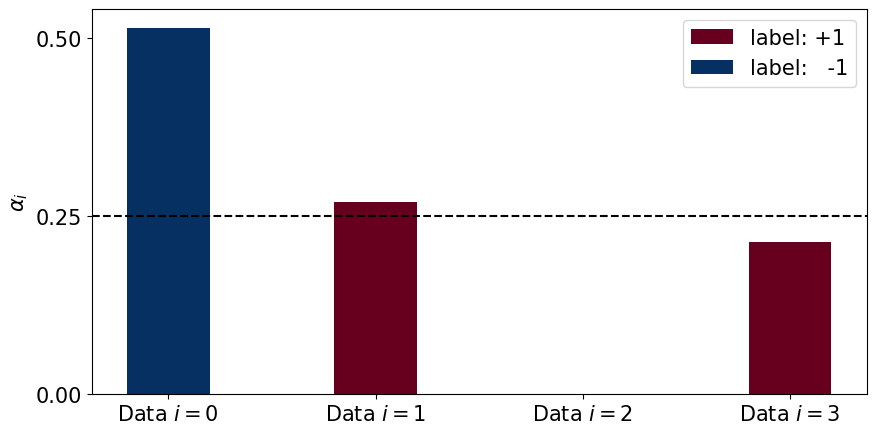

In [98]:
with plt.rc_context({
    'axes.labelsize':1.5*plt.rcParams['font.size'], 
    'figure.figsize':(10, 5),
    'xtick.labelsize':1.5*plt.rcParams['font.size'],
    'ytick.labelsize':1.5*plt.rcParams['font.size'],
    'lines.markersize':10,
    'legend.fontsize':1.5*plt.rcParams['font.size']
    }):
    plt.bar(np.array([0, 1, 2, 3])[y>0.5], alpha[y>0.5], width=0.4, color='#67001f', label='label: +1')
    plt.bar(np.array([0, 1, 2, 3])[y<0.5], alpha[y<0.5], width=0.4, color='#053061', label='label:   -1')
    plt.axhline(0.25, c='k', linestyle='--')
    plt.xticks([0, 1, 2, 3], map(r"Data $i=${:}".format, [0, 1, 2, 3]))
    plt.legend()
    plt.yticks([0, 0.25, 0.5])
    plt.ylabel(r'$\alpha_i$')
    plt.savefig('temp.svg')

In [80]:
from pylab import *

cmap = cm.get_cmap('RdBu', 5)    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#67001f
#e58267
#f7f7f7
#6bacd0
#053061
